<a href="https://colab.research.google.com/github/Al-ameen007/CIFAR_10/blob/main/Copy_of_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theoritcal Foundation of Machine Learning Final Project 


1.   Youseef Osama Ahmed 20190629
2.   Mohamed Alameen AbdAlziz 20190720
3.   Osama Khaled Abd-Alghafar
4.   Solhof
5.   Amira



In [ ]:
import numpy as np

# Loading the data
Using the keras datasets to load the data, the data is already splitied into train and test sets.
We just going to take a portion of the train to make a validation set

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Exploring the Data

(<matplotlib.image.AxesImage at 0x7fe8bece7550>, array([9], dtype=uint8))

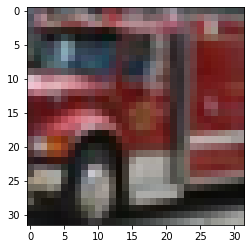

In [ ]:
import matplotlib.pyplot as plt
index = 88
plt.imshow(X_train[index]), y_train[index]

some image are too bad even a human being can't recognize it given the following image which is suppose to be for a **Deer**

(<matplotlib.image.AxesImage at 0x7fe8be78f690>, array([4], dtype=uint8))

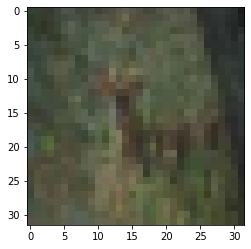

In [ ]:
plt.imshow(X_train[10]), y_train[10]

In [ ]:
labels = {1:  'airplane',   #back to the documntation
          2:  'bird', 
          3:  'cat', 
          4:  'deer', 
          5:  'dog', 
          6:  'frog', 
          7:  'horse', 
          8:  'ship', 
          9:  'truck'}

In [ ]:
unique, counts = np.unique(y_train, return_counts=True) #all the classes equal to each other
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

# Data Preprocessing

## Avg Pooling

 looking at the first image at the first pixel (0, 0) coordinates,at each pixel we got three RGB values and we are going to replace them by a single value computed by there avreage.

In [ ]:
def avg_pixels(data):
  data_avg = data.copy()
  for i in range(len(data)): #looping over the data
    for x in range(len(data[0])): #looping over the x_coordinates
      for y in range(len(data[0].T[0])): #looping over the y_coordinates
        data_avg[i][x][y] = np.average(data[i][x][y])
  return data_avg

In [ ]:
X_train_avg = avg_pixels(X_train)

In [ ]:
len(X_train_avg)

50000

After Averging the images there is no change but only converted into gray images like the following examples

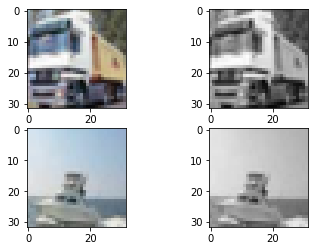

In [ ]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train[1])
axarr[0,1].imshow(X_train_avg[1])
axarr[1,0].imshow(X_train[100])
axarr[1,1].imshow(X_train_avg[100])

Since now all the RGB channels got the same value no need to keep them all instead we are going to keep only single chanel, converting each image into 32, 32 matrix, which provide efficent way in computation      
ex. the first image at first pixel will get the values (61, 61, 61) so  we will make it one channel (61)

In [ ]:
X_train_avg[0][0][0]

array([61, 61, 61], dtype=uint8)

In [ ]:
def convert(data):
  imgs = []
  for i in range(len(data)):
    img = []
    for j in range(len(data[0])):
      tmp = [int(np.unique(hold)[0]) for hold in X_train_avg[i][j]]
      img.append(tmp)
    imgs.append(img)
  return np.asarray(imgs)

In [ ]:
X_train_conv = convert(X_train_avg)

In [ ]:
len(X_train_conv)

50000

a sample for converted image into 32 * 32 

In [ ]:
max(X_train_conv[0].flatten()) * 29791

7328586

## Applying the momentum 

In [ ]:
def c_momentum(data, c = 3):
  m_data = []
  mean_x = (len(data[0][0]) + 1) / 2
  mean_y = (len(data[0][0].T) + 1) / 2
  flag = 0
  for img in data:
    if flag %1000 == 0:
      print(f"Working...... {flag}")
    flag += 1
    ms = []
    for p in range(c+1):
      for q in range(c+1):
        if p + q <= c:
          tmp = np.multiply((np.power(np.arange(len(data[0][0])) - mean_x, p) * np.power(np.arange(len(data[0].T[0] - mean_y)), q)) , img)
          ms.append(tmp.sum().sum())
    m_data.append(ms)
  return np.asarray(m_data)

In [ ]:
X_train_m = c_momentum(X_train_conv, c  = 3)

In [ ]:
len(X_train_m[0])

10

In [ ]:
len(X_train_m)

50000

In [ ]:
X_train_m[0]

array([ 1.05589000e+05,  1.63695100e+06,  3.37076310e+07,  7.79918347e+08,
        1.92998227e+10, -1.05267500e+05,  6.69793950e+06,  2.23742436e+08,
        6.43117001e+09,  8.43485325e+06,  1.13226434e+08,  2.73941982e+09,
       -2.59486449e+07,  8.71183667e+08,  1.29933631e+09])

## Spliting the train data into train and validation by 10%

In [ ]:
len(X_train_m)

50000

In [ ]:
from sklearn.model_selection import train_test_split
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train_m, y_train, test_size=0.1)

In [ ]:
len(X_trainn), len(X_test)

(45000, 10000)

## Encoding the output

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
y_trainn = encoder.fit_transform(y_trainn)
y_val = encoder.transform(y_val)

# Building the Model


## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_trainn, y_train.ravel())

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(svc.predict(X_val), y_val)

0.1654

In [ ]:
svc2 = SVC(kernel='poly', degree=3)
svc2.fit(X_trainn, y_trainn.ravel())

SVC(kernel='poly')

In [ ]:
accuracy_score(svc2.predict(X_val), y_val)

0.1514

In [ ]:
svc3 = SVC(kernel='sigmoid', C = 0.1)
svc3.fit(X_trainn, y_trainn.ravel())

SVC(C=0.1, kernel='sigmoid')

In [ ]:
accuracy_score(svc3.predict(X_val), y_val)

0.1332

In [ ]:
#svc4 = SVC(kernel='linear', C = 0.1)
#svc4.fit(X_trainn, y_trainn.ravel())

In [ ]:
#accuracy_score(svc4.predict(X_val), y_val)

##Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(criterion='entropy', max_depth=70)
forest.fit(X_trainn, y_trainn.ravel())

RandomForestClassifier(criterion='entropy', max_depth=70)

In [ ]:
accuracy_score(forest.predict(X_val), y_val)

0.1842

##Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=100)
tree.fit(X_trainn, y_trainn.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
accuracy_score(tree.predict(X_val), y_val)

0.1388

##KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_trainn, y_trainn.ravel())

KNeighborsClassifier(n_neighbors=6)

In [ ]:
accuracy_score(knn.predict(X_val), y_val)

0.1598

## Trying diffrent momentum value

In [ ]:
X_train_m7 = c_momentum(X_train_conv, c = 7)

In [ ]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_train_m7, y_train, test_size=0.1)

In [ ]:
svc_m7 = SVC()
svc_m7.fit(X_train7, y_train7.ravel())

SVC()

In [ ]:
accuracy_score(svc_m7.predict(X_test7), y_test7)

0.1578

In [ ]:
X_train_m44 = c_momentum(X_train_conv, c = 44) ##Then number of momentums equal to number of pixels 1035

Working...... 0
Working...... 1000
Working...... 2000
Working...... 3000
Working...... 4000
Working...... 5000
Working...... 6000
Working...... 7000
Working...... 8000
Working...... 9000
Working...... 10000
Working...... 11000
Working...... 12000
Working...... 13000
Working...... 14000
Working...... 15000
Working...... 16000
Working...... 17000
Working...... 18000
Working...... 19000
Working...... 20000
Working...... 21000
Working...... 22000
Working...... 23000
Working...... 24000
Working...... 25000
Working...... 26000
Working...... 27000
Working...... 28000
Working...... 29000
Working...... 30000
Working...... 31000
Working...... 32000
Working...... 33000
Working...... 34000


In [ ]:
X_train44, X_val44, y_train44, y_val44 = train_test_split(X_train_m44, y_train, test_size=0.1)

In [ ]:
len(X_train44[0])

1035

In [ ]:
svc_m44 = SVC()
svc_m44.fit(X_train44, y_train44.ravel())

In [ ]:
accuracy_score(svc_m44.predict(X_val44), y_val44)

In [ ]:
tmp = 0
for i in range(44+1):
  for j in range(44+1):
    if i + j <= 44:
      tmp += 1
print(tmp)

1035
